In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.impute import KNNImputer

### Reading main datasets 

In [2]:
data_frames = {}
for file in os.listdir('./data/'):
     year = str(file).split('_')[-2]
     path = os.path.join('data',file,file+'.csv')
     df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
     print(path)
     data_frames['df_'+year] = df

C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2016_v01\dsc_fc_summed_spectra_2016_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2017_v01\dsc_fc_summed_spectra_2017_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2018_v01\dsc_fc_summed_spectra_2018_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2019_v01\dsc_fc_summed_spectra_2019_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2020_v01\dsc_fc_summed_spectra_2020_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2021_v01\dsc_fc_summed_spectra_2021_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2022_v01\dsc_fc_summed_spectra_2022_v01.csv


In [3]:
df16, df17,df18,df19,df20,df21,df22,df23 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022'],data_frames['df_2023']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
df_final.rename({0:'date',1:'x',2:'y',3:'z'},inplace = True,axis =1)

### Reading indexs dataframe 

In [5]:
ind = pd.read_csv('./kpg.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016) & (ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.head()

C:\Users\lluis\AppData\Local\Temp\ipykernel_18404\2585190920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)


,YYYY,MM,DD,h,hh._m,days,days_m,Kp,ap,D
245448,2016,1,1,0.0,1.5,30681.000,30681.0625,6.000,80,1
245449,2016,1,1,3.0,4.5,30681.125,30681.1875,5.333,56,1
245450,2016,1,1,6.0,7.5,30681.250,30681.3125,5.000,48,1
245451,2016,1,1,9.0,10.5,30681.375,30681.4375,3.333,18,1
245452,2016,1,1,12.0,13.5,30681.500,30681.5625,1.667,6,1


## Checking nulls 

In [6]:
def print_null_proportion(df):
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Create a bar plot of null value percentages
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Null Values")
    plt.title("Percentage of Null Values in the Dataset")

    # Set the y-axis scale from 0 to 100
    plt.ylim(0, 100)

    plt.tight_layout()

    # Show the plot
    plt.show()

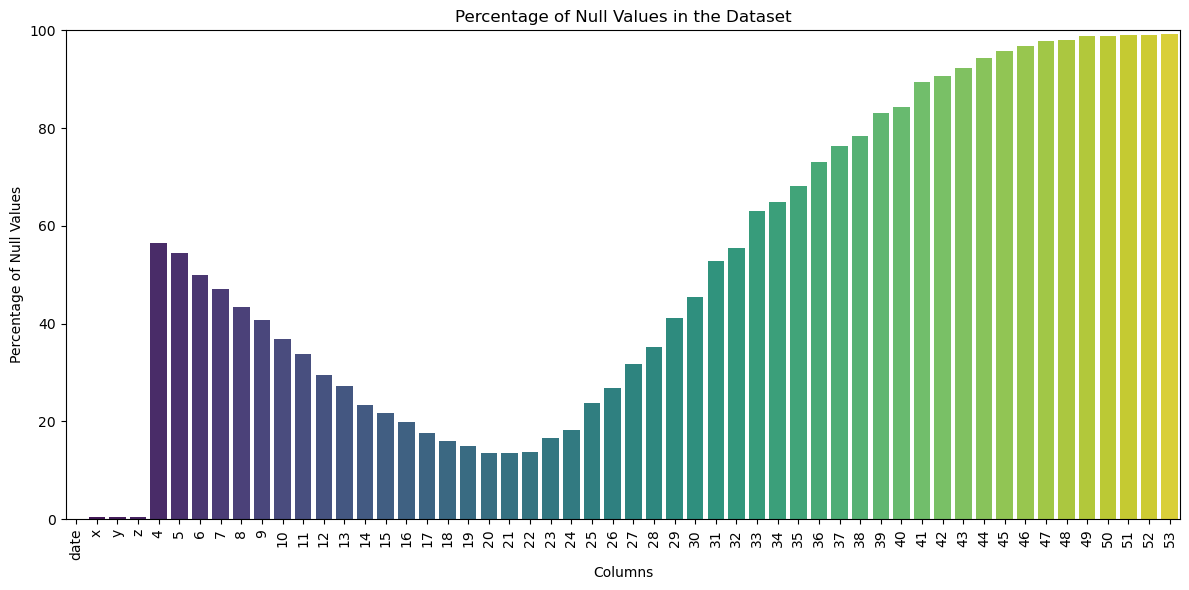

In [7]:
print_null_proportion(df_final)

In [8]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls


## Merging dataframes

In [9]:
# df_final['date'] = pd.to_datetime(df_final['date'])

# # Calculate the time interval (90 minutes) in seconds
# interval = pd.Timedelta(minutes=180).total_seconds()

# # Create a custom grouping column based on time intervals
# df_final['group'] = (df_final['date'].sub(df_final['date'].min()).dt.total_seconds() / interval).astype(int)

# # Group the DataFrame by the custom 'group' column and calculate the mean for each group
# df_grouped = df_final.groupby('group').mean()

# # Reset the index to have the 'group' as a regular column again if needed
# df_grouped.reset_index(inplace=True)

# # Display the resulting DataFrame
# df_grouped

In [10]:
def truncateHour(x):
    if x< 3:
        return 0
    elif x< 6:
        return 3
    elif x < 9:
        return 6
    elif x< 12:
        return 9
    elif x< 15:
        return 12
    elif x< 18:
        return 15
    elif x< 21:
        return 18
    else:
        return 21

In [11]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour
df_final['h'] = df_final['h'].apply(truncateHour)

In [12]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()
df_grouped

date         x         y          z           4  \
YYYY MM DD h                                                                   
2016 1  1  0  2016-01-01 01:29:30  4.433160 -1.247880 -13.165854         NaN   
           3  2016-01-01 04:29:30  3.448769 -3.864323  -8.984068  139.338250   
           6  2016-01-01 07:29:30  4.407694 -5.729229  -6.420560  143.819967   
           9  2016-01-01 10:29:30  3.758710 -6.973925   3.080465         NaN   
           12 2016-01-01 13:29:30  6.514989 -6.250111  -0.786576  142.064460   
...                           ...       ...       ...        ...         ...   
2022 12 31 9  2022-12-31 10:29:30 -4.575782  1.086207   2.755094   20.038541   
           12 2022-12-31 13:29:30 -2.912565  0.545443  -1.746772   25.665688   
           15 2022-12-31 16:29:30 -3.569145  2.629413   0.167908   32.373597   
           18 2022-12-31 19:29:30 -4.063840  1.834405  -1.244176   24.981998   
           21 2022-12-31 22:29:30 -4.004869  1.863977  -0.416700   24.341184   

                        5           6           7           8           9  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   108.341150  131.678031  127.960636  124.528562  108.572063   
           6   103.094027  126.340200  129.495920  124.643217   96.828230   
           9          NaN         NaN         NaN         NaN         NaN   
           12  102.750320  127.700920  130.539498  124.235998   73.482044   
...                   ...         ...         ...         ...         ...   
2022 12 31 9     0.253126    2.232621   10.446358   12.015030    1.288711   
           12    0.231726    0.301693    7.798967   15.294495    0.234433   
           15    0.231726    0.533728   11.987406   18.079204    0.313125   
           18    0.231726    0.869348   12.322342   12.377256    0.253563   
           21    0.231726    0.497367    3.097159    9.419372    0.248380   

               ...          44          45          46          47  \
YYYY MM DD h   ...                                                   
2016 1  1  0   ...         NaN         NaN         NaN         NaN   
           3   ...  161.363000  134.080562  151.425344  140.448156   
           6   ...  163.193200  131.601167  151.214300  144.231933   
           9   ...         NaN         NaN         NaN         NaN   
           12  ...  162.297380  133.708920  152.504700  142.948180   
...            ...         ...         ...         ...         ...   
2022 12 31 9   ...         NaN         NaN         NaN         NaN   
           12  ...  372.433667  295.602368  362.085000         NaN   
           15  ...  351.656905  288.231412  386.202500         NaN   
           18  ...  316.262016  291.814545  388.993750         NaN   
           21  ...  339.274714  277.562000         NaN         NaN   

                       48          49          50          51          52  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   132.193750  151.046906  151.407406  134.467309  162.754562   
           6   129.541733  147.492067  156.671133  137.356233  158.362867   
           9          NaN         NaN         NaN         NaN         NaN   
           12  129.320420  148.748020  156.235200  136.425440  159.369940   
...                   ...         ...         ...         ...         ...   
2022 12 31 9          NaN         NaN         NaN         NaN         NaN   
           12         NaN         NaN         NaN         NaN         NaN   
           15         NaN         NaN         NaN         NaN         NaN   
           18         NaN         NaN         NaN         NaN         NaN   
           21         NaN         NaN         NaN         NaN         NaN   

                       53  
YYYY MM DD h               
2016 1  1  0     

In [14]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

,YYYY,DD,MM,h,date,x,y,z,4,5,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


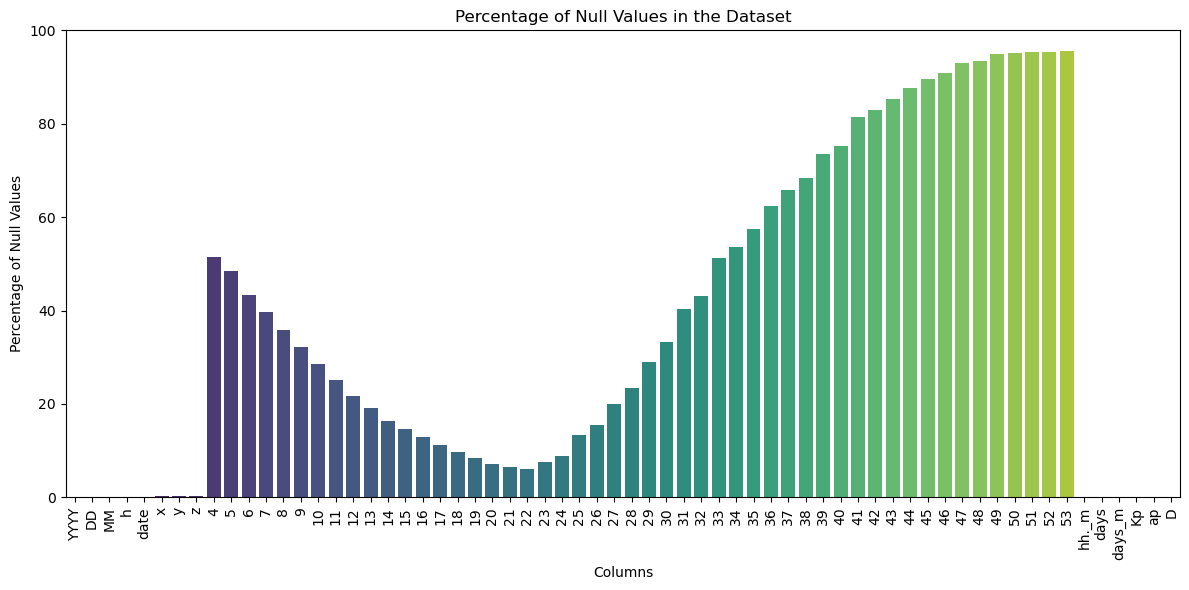

In [15]:
print_null_proportion(merged_df)

In [16]:
filtered_df = merged_df.drop(merged_df.columns[37:58],axis=1)

In [17]:
# from sklearn.impute import KNNImputer
# inputer = KNNImputer(n_neighbors=4)

In [18]:
# filtered_df.columns = filtered_df.columns.astype(str)
# columns_with_missing = filtered_df.columns[filtered_df.isnull().any()]

# df_missing = filtered_df[columns_with_missing]
# df_non_missing = filtered_df.drop(columns=columns_with_missing)

# # Initialize the KNNImputer (you can specify the number of neighbors 'n_neighbors')
# imputer = KNNImputer(n_neighbors=4)

# # Fit the imputer on non-missing data and transform the missing data
# df_missing_imputed = pd.DataFrame(imputer.fit_transform(df_non_missing), columns=df_non_missing.columns)

# # Combine the imputed data with the non-missing data
# df_imputed = pd.concat([df_missing_imputed, df_missing], axis=1)

In [19]:
filtered_df= filtered_df.drop(['hh._m','days','days_m','date','YYYY','DD','MM','h','D'],axis=1)

In [20]:
non_na = filtered_df.dropna()
non_na.head()

,x,y,z,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,Kp,ap
1,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528562,108.572063,108.378163,...,149.215594,148.254094,141.746187,153.068531,133.417875,156.115273,157.808188,151.744812,5.333,56
2,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,137.976867,141.698067,135.005667,147.147667,129.626667,155.001633,154.731300,146.782767,5.000,48
4,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,142.380333,139.239843,130.050451,148.626627,132.570392,151.837784,149.355490,147.432392,1.667,6
5,5.987184,-5.670084,0.123970,143.002722,103.196814,127.037270,130.115054,124.606150,92.997796,98.774156,...,138.887989,138.062594,131.802217,150.297656,132.425644,151.847561,151.694983,149.333400,1.000,4
6,4.177648,-1.696730,-0.348509,132.232489,109.701154,141.846061,131.416072,119.297978,114.855887,128.623580,...,173.067572,158.152000,141.754006,153.012372,139.532894,161.093950,160.100139,156.799294,2.000,7


## Data studying 

In [22]:
filtered_df[filtered_df['Kp']>7].shape

(6, 34)

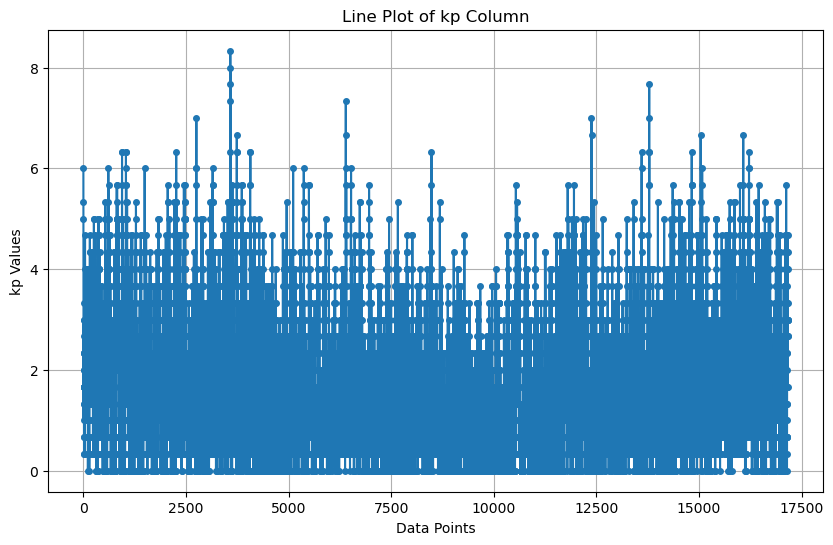

In [23]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(filtered_df['Kp'], linestyle='-', marker='o', markersize=4)  # Line plot with markers
plt.title('Line Plot of kp Column')  # Set the title
plt.xlabel('Data Points')  # Set the x-axis label
plt.ylabel('kp Values')  # Set the y-axis label
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot

## Spliting data 

In [24]:
X = non_na.drop(['Kp','ap'],axis = 1)
y = non_na['Kp']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

##  Generating model

In [25]:
input_shape = X_train.shape[1]

model = keras.Sequential()
model.add(layers.Input(shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [26]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])  # You can add other metrics as needed

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
76/76 [==============================] - 1s 4ms/step - loss: 280.9495 - mean_absolute_error: 11.1976 - val_loss: 12.5958 - val_mean_absolute_error: 2.1732
Epoch 2/50
76/76 [==============================] - 0s 2ms/step - loss: 43.6218 - mean_absolute_error: 4.8023 - val_loss: 10.5952 - val_mean_absolute_error: 2.5332
Epoch 3/50
76/76 [==============================] - 0s 1ms/step - loss: 24.1400 - mean_absolute_error: 3.6600 - val_loss: 5.2638 - val_mean_absolute_error: 1.6215
Epoch 4/50
76/76 [==============================] - 0s 2ms/step - loss: 16.4559 - mean_absolute_error: 3.0707 - val_loss: 2.9476 - val_mean_absolute_error: 1.2585
Epoch 5/50
76/76 [==============================] - 0s 2ms/step - loss: 9.7420 - mean_absolute_error: 2.3848 - val_loss: 2.4691 - val_mean_absolute_error: 1.1854
Epoch 6/50
76/76 [==============================] - 0s 2ms/step - loss: 7.6559 - mean_absolute_error: 2.0625 - val_loss: 2.3451 - val_mean_absolute_error: 1.1811
Epoch 7/50
76/76 [==

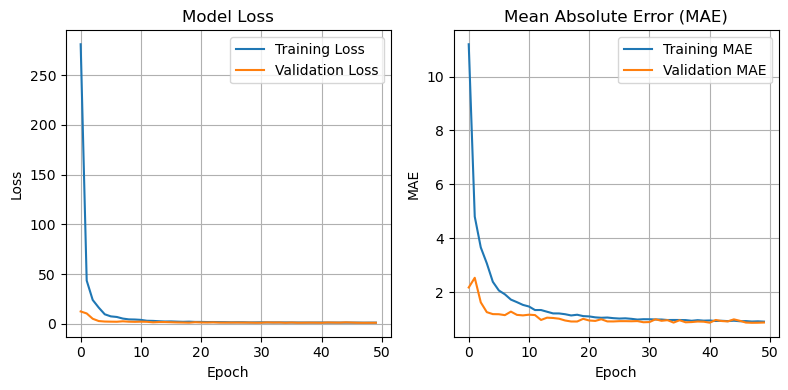

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 2 rows, 1 column

# Plot the first subplot (Training Loss and Validation Loss)
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot the second subplot (Training MAE and Validation MAE)
axs[1].plot(history.history['mean_absolute_error'], label='Training MAE')
axs[1].plot(history.history['val_mean_absolute_error'], label='Validation MAE')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [31]:
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

28/28 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 0.87
Mean Squared Error (MSE): 1.26


In [32]:
aa = filtered_df.dropna()

In [33]:
aa.shape

(4341, 34)

In [34]:
non_na.shape

(4341, 34)

## Generating recurrent NN 

In [46]:
non_na = non_na.reset_index(drop=True)

In [86]:
def create_train_window(valores, group_size=20):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(0, len(valores)-group_size-1):
        if(i < (len(valores)-group_size-1)*0.8):
            x_train.append(valores[i:group_size+i])
            y_train.append(valores[i+group_size][-2])
        else:
            x_test.append(valores[i:group_size+i])
            y_test.append(valores[i+group_size][-2])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [87]:
x_train, y_train, x_test, y_test = create_train_window(np.array(non_na), 40)
input_shape_w=np.shape(x_train[0])
input_shape_w

(40, 34)

In [88]:
#Creación MODELO
model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=input_shape_w, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(128, return_sequences=False, dropout=0, recurrent_dropout=0))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 128)           83456     
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)               

In [ ]:
model.fit(x_train, y_train, shuffle=True, batch_size=8, epochs=20, validation_split=0.2)

Epoch 1/20
344/344 [==============================] - 9s 22ms/step - loss: 1.7221 - accuracy: 0.0898 - val_loss: 1.2984 - val_accuracy: 0.0669
Epoch 2/20
 16/344 [>.............................] - ETA: 6s - loss: 1.5601 - accuracy: 0.0469

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_prediction)

In [ ]:
mean_squared_error(y_test,y_prediction)

In [ ]:
plt.plot(y_test)
plt.plot(y_prediction,c='r')